# various image segmentation tech

### threshold base segmentation

In [ ]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage

Let’s read the downloaded image and plot it:

In [ ]:
image = plt.imread('1.jpeg')
image.shape
plt.imshow(image)

In [ ]:
image.shape
image

It is a three-channel image (RGB). We need to convert it into grayscale so that we only have a single channel. Doing this will also help us get a better understanding of how the algorithm works.

In [ ]:
gray = rgb2gray(image)
plt.imshow(gray, cmap='gray')

In [ ]:
gray.shape

Now, we want to apply a certain threshold to this image. This threshold should separate the image into two parts – the foreground and the background. Before we do that, let’s quickly check the shape of this image:

The height and width of the image is 192 and 263 respectively. We will take the mean of the pixel values and use that as a threshold. If the pixel value is more than our threshold, we can say that it belongs to an object. If the pixel value is less than the threshold, it will be treated as the background. Let’s code this:

In [ ]:
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

Nice! The darker region (black) represents the background and the brighter (white) region is the foreground. We can define multiple thresholds as well to detect multiple objects: 

In [ ]:
gray = rgb2gray(image)
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 3
    elif gray_r[i] > 0.5:
        gray_r[i] = 2
    elif gray_r[i] > 0.25:
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

There are four different segments in the above image. You can set different threshold values and check how the segments are made. Some of the advantages of this method are:

Calculations are simpler
Fast operation speed
When the object and background have high contrast, this method performs really well
But there are some limitations to this approach. When we don’t have significant grayscale difference, or there is an overlap of the grayscale pixel values, it becomes very difficult to get accurate segments.

In [ ]:
image = plt.imread('walking.png',0)
image.shape
plt.imshow(image)

In [ ]:
gray = rgb2gray(image)

In [ ]:
# now we are doing threshold based image segmentation

In [ ]:
gray_sh=gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(0,gray_sh.size):
    if(gray_sh[i] > gray.mean()):
        gray_sh[i]=1
    else:
        gray_sh[i]=0
gray_sh=gray_sh.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray_sh,cmap='gray')

In [ ]:
gray_sh.size

### Edge Detection Segmentation
What divides two objects in an image? There is always an edge between two adjacent regions with different grayscale values (pixel values). The edges can be considered as the discontinuous local features of an image.

We can make use of this discontinuity to detect edges and hence define a boundary of the object. This helps us in detecting the shapes of multiple objects present in a given image. Now the question is how can we detect these edges? This is where we can make use of filters and convolutions. Refer to this article if you need to learn about these concepts.

The below visual will help you understand how a filter colvolves over an image :

Here’s the step-by-step process of how this works:

- Take the weight matrix
- Put it on top of the image
- Perform element-wise multiplication and get the output
- Move the weight matrix as per the stride chosen
- Convolve until all the pixels of the input are used
- The values of the weight matrix define the output of the convolution. My advice – it helps to extract features from the input. Researchers have found that choosing some specific values for these weight matrices helps us to detect horizontal or vertical edges (or even the combination of horizontal and vertical edges).

One such weight matrix is the sobel operator. It is typically used to detect edges. The sobel operator has two weight matrices – one for detecting horizontal edges and the other for detecting vertical edges. Let me show how these operators look and we will then implement them in Python.

Sobel filter (horizontal) =

The key advantage of using k-means algorithm is that it is simple and easy to understand. We are assigning the points to the clusters which are closest to them.

Let’s put our learning to the test and check how well k-means segments the objects in an image. We will be using this image, so download it, read it and and check its dimensions:

(192, 263, 3)


(50496, 3)

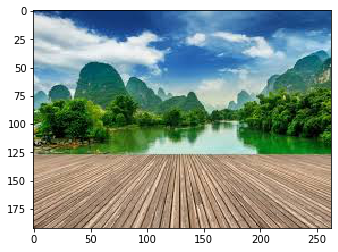

In [5]:
from matplotlib import pyplot as plt
pic = plt.imread('1.jpeg')/255  # dividing by 255 to bring the pixel values between 0 and 1
print(pic.shape)
plt.imshow(pic)
pic_n = pic.reshape(pic.shape[0]*pic.shape[1], pic.shape[2])
pic_n.shape

In [6]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(pic_n)
pic2show = kmeans.cluster_centers_[kmeans.labels_]

In [9]:
kmeans.cluster_centers_[kmeans.labels_]

array([[0.15877742, 0.37806202, 0.52669195],
       [0.15877742, 0.37806202, 0.52669195],
       [0.15877742, 0.37806202, 0.52669195],
       ...,
       [0.65999962, 0.57143413, 0.467135  ],
       [0.65999962, 0.57143413, 0.467135  ],
       [0.65999962, 0.57143413, 0.467135  ]])

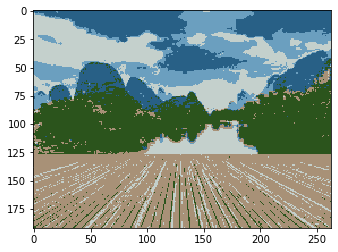

In [7]:
cluster_pic = pic2show.reshape(pic.shape[0], pic.shape[1], pic.shape[2])
plt.imshow(cluster_pic)

Amazing, isn’t it? We are able to segment the image pretty well using just 5 clusters. I’m sure you’ll be able to improve the segmentation by increasing the number of clusters.

k-means works really well when we have a small dataset. It can segment the objects in the image and give impressive results. But the algorithm hits a roadblock when applied on a large dataset (more number of images).

It looks at all the samples at every iteration, so the time taken is too high. Hence, it’s also too expensive to implement. And since k-means is a distance-based algorithm, it is only applicable to convex datasets and is not suitable for clustering non-convex clusters.

Finally, let’s look at a simple, flexible and general approach for image segmentation.

### Mask R-CNN
Data scientists and researchers at Facebook AI Research (FAIR) pioneered a deep learning architecture, called Mask R-CNN, that can create a pixel-wise mask for each object in an image. This is a really cool concept so follow along closely!

Mask R-CNN is an extension of the popular Faster R-CNN object detection architecture. Mask R-CNN adds a branch to the already existing Faster R-CNN outputs. The Faster R-CNN method generates two things for each object in the image:

Its class
The bounding box coordinates
Mask R-CNN adds a third branch to this which outputs the object mask as well. Take a look at the below image to get an intuition of how Mask R-CNN works on the inside: